Data Exploration and Preprocessing

In [53]:
import pandas as pd

data = pd.read_csv('insurance.csv')
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
print(data.isnull().sum())

# Statistical summary
print(data.describe())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


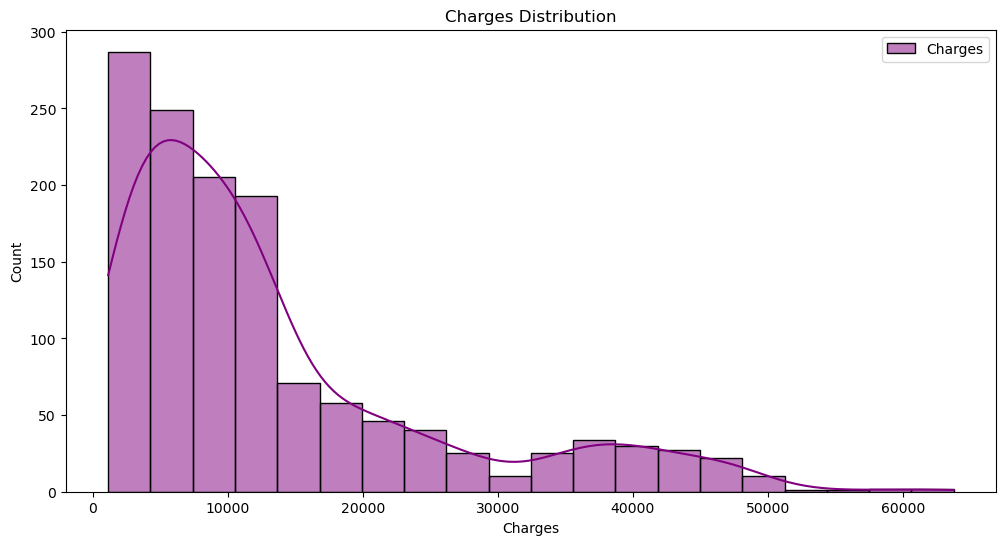

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(data['charges'], kde=True, bins=20, label='Charges', color='purple')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.legend()
plt.show()

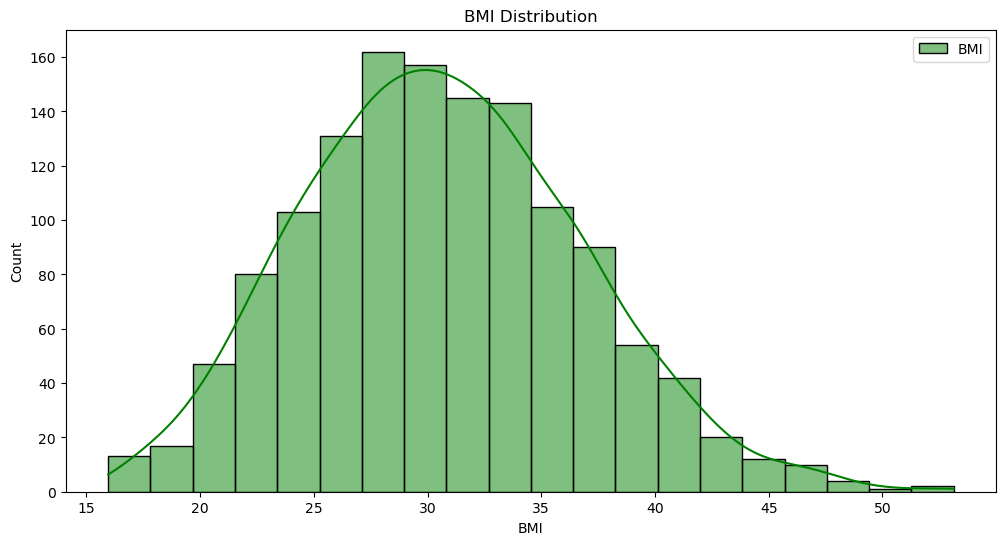

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(data['bmi'], kde=True, bins=20, label='BMI', color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.legend()
plt.show()


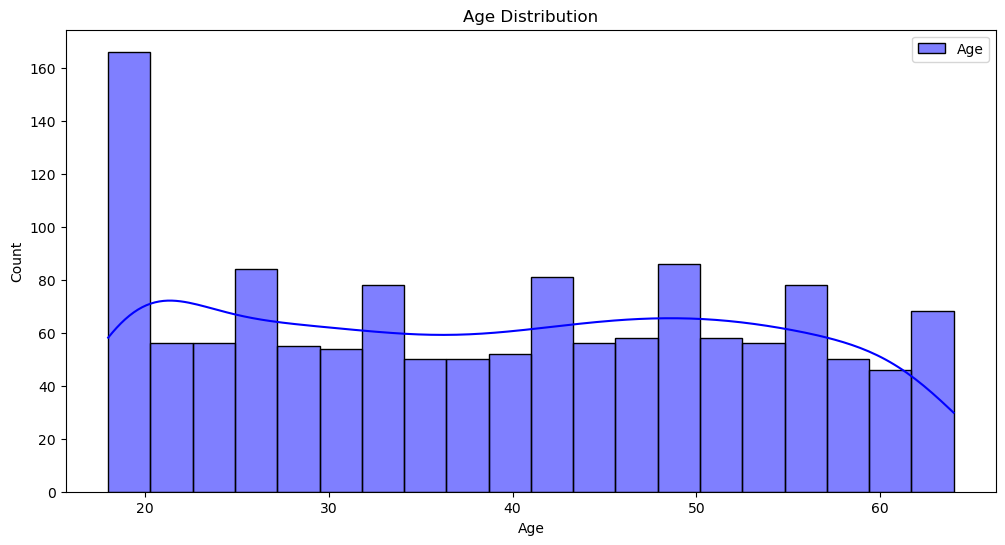

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, bins=20, label='Age', color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.legend()
plt.show()

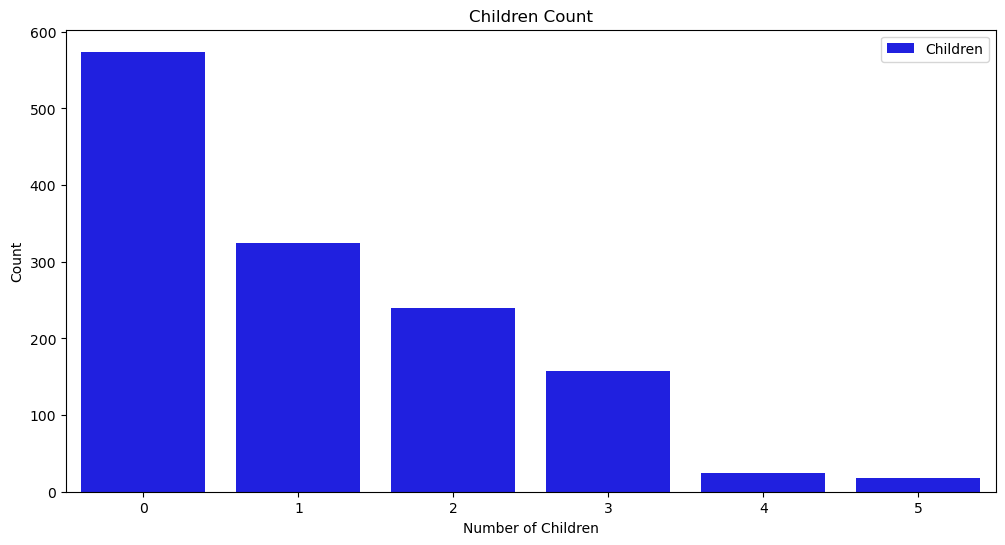

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='children', color='blue')
plt.title('Children Count')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(labels=['Children'])
plt.show()

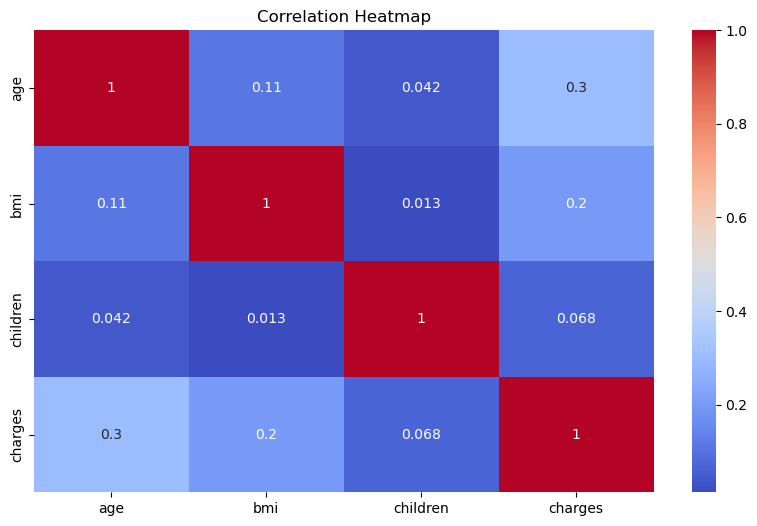

In [58]:
# Correlation heatmap (only for numerical columns)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

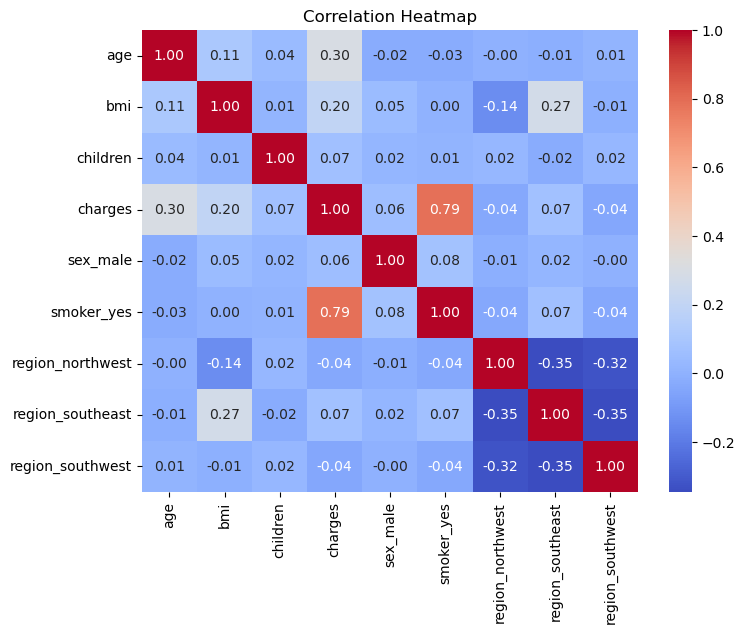

In [59]:
# Correlation heatmap for numerical and non-numerical features

# Convert categorical columns into numeric using one-hot encoding
encoded_data = pd.get_dummies(data, drop_first=True)

# Generate the heatmap for the transformed data
plt.figure(figsize=(8, 6))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

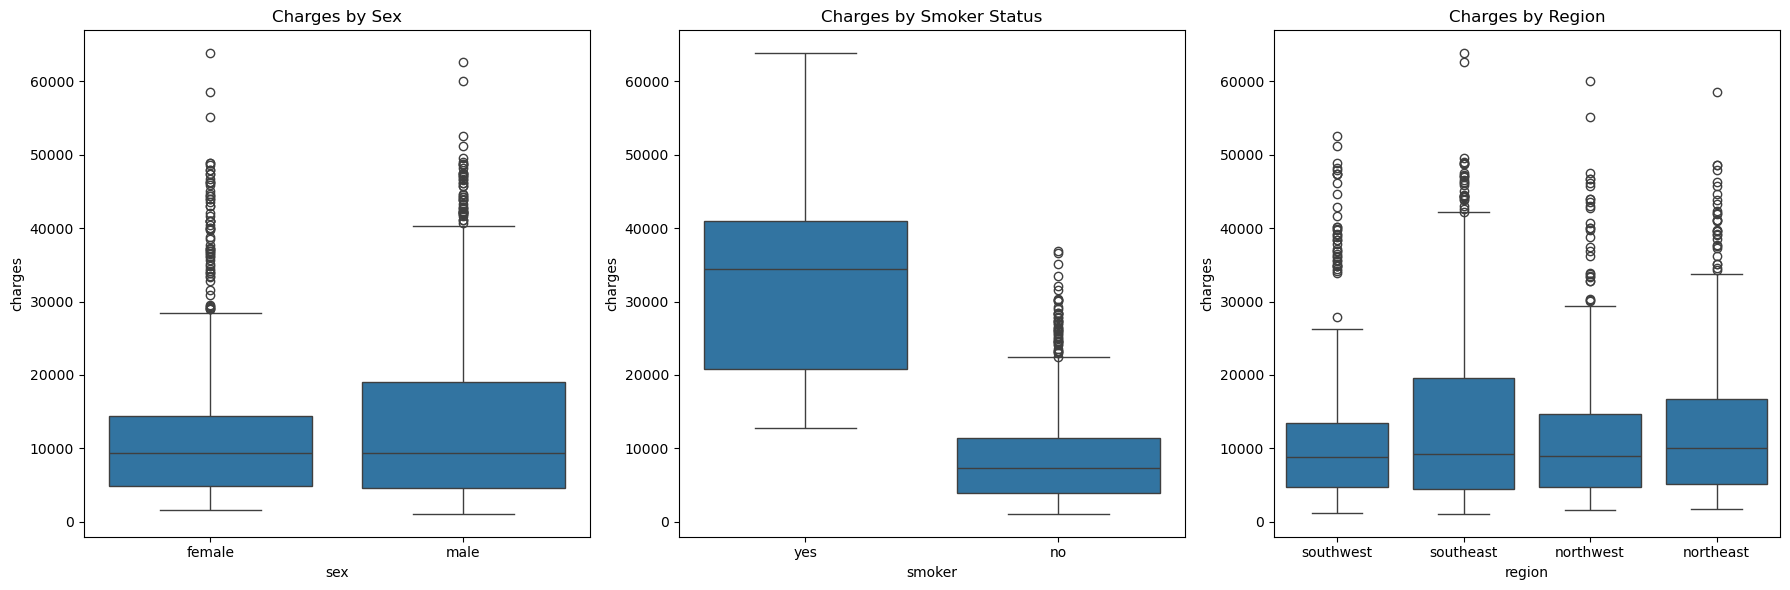

In [60]:

# Boxplots for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=data, x='sex', y='charges', ax=axes[0]).set_title('Charges by Sex')
sns.boxplot(data=data, x='smoker', y='charges', ax=axes[1]).set_title('Charges by Smoker Status')
sns.boxplot(data=data, x='region', y='charges', ax=axes[2]).set_title('Charges by Region')
plt.tight_layout()
plt.show()

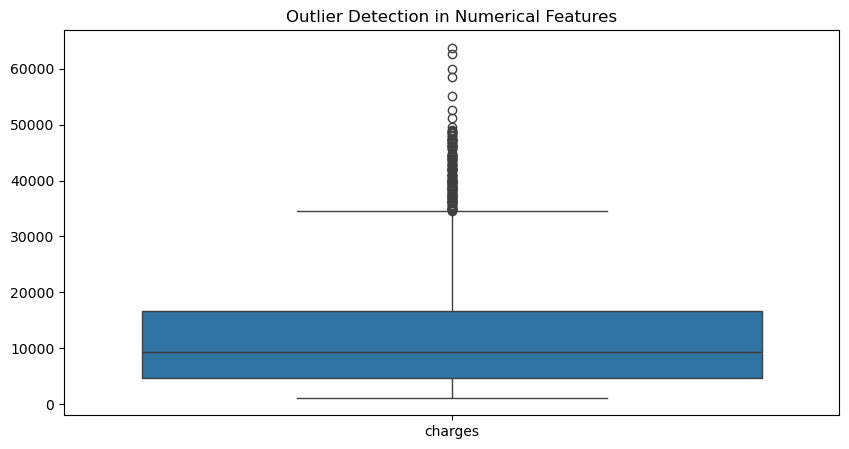

In [61]:
# Boxplot for outlier detection (target variable is numerical)

plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['charges']])
plt.title('Outlier Detection in Numerical Features')
plt.show()

In [62]:
#Feature Engineering

data['age_bmi'] = data['age'] * data['bmi']


In [63]:
#Encode Categorical Variables and Scale Data

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children', 'age_bmi']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

X = data.drop(columns=['charges'])
y = data['charges']

X_preprocessed = preprocessor.fit_transform(X)
print("\nPreprocessed Data:\n")
print(X_preprocessed[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Preprocessed Data:

[[-1.43876426 -0.45332    -0.90861367 -1.30447634  1.          0.
   0.          1.          0.          0.          0.          1.        ]
 [-1.50996545  0.5096211  -0.07876719 -1.1556287   0.          1.
   1.          0.          0.          0.          1.          0.        ]
 [-0.79795355  0.38330685  1.58092576 -0.55047577  0.          1.
   1.          0.          0.          0.          1.          0.        ]
 [-0.4419476  -1.30553108 -0.90861367 -0.88495226  0.          1.
   1.          0.          0.          1.          0.          0.        ]
 [-0.51314879 -0.29255641 -0.90861367 -0.5501695   0.          1.
   1.          0.          0.          1.          0.          0.        ]]


Model Development

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score  # k-fold cross-validation


# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_results = {}



Model Evaluation with Cross-Validation


Model Performance (Cross-Validation)

Cross-Validation Model Evaluation Result:
                    R² Mean  R² StdDev     RMSE Mean  RMSE StdDev
Linear Regression  0.738765   0.030955   6144.063753  2430.510491
Random Forest      0.834982   0.024399   4892.949064  2176.759763
SVR               -0.098935   0.032143  12586.789978  3703.968875


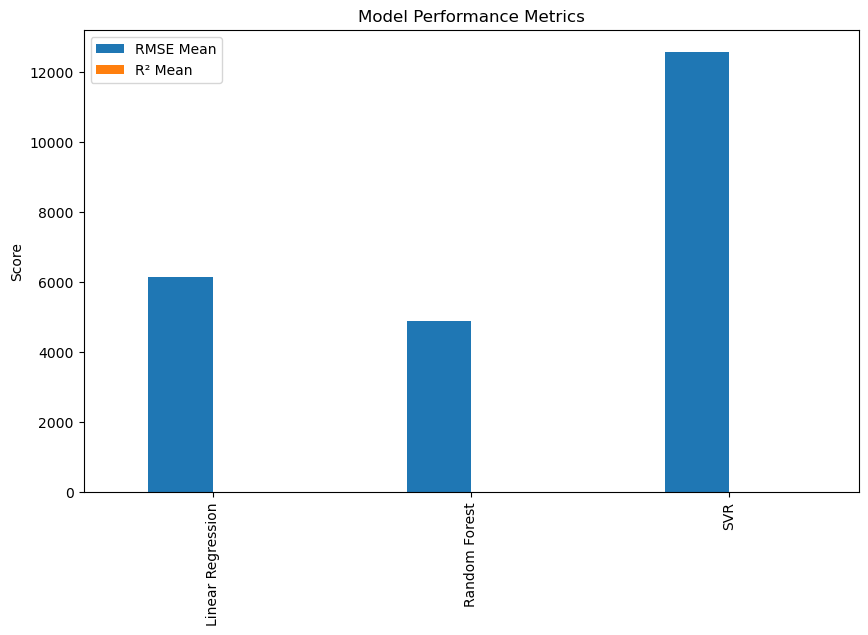

In [67]:
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt


# Model Training and Evaluation
final_result = {}


print("\nModel Performance (Cross-Validation)")

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Cross-validation for RMSE
    scores_mse = cross_val_score(pipeline, X_train, y_train, cv= kfold, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores_mse)  # Convert negative MSE to RMSE
    
    # Cross-validation for R²
    scores_r2 = cross_val_score(pipeline, X_train, y_train, cv= kfold, scoring='r2')
    scores_rmse = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

    
    # Store results
    final_result[name] = {
        'R² Mean': np.mean(scores_r2),
        'R² StdDev': np.std(scores_r2),
        'RMSE Mean': np.sqrt(-np.mean(scores_rmse)),
        'RMSE StdDev': np.sqrt(np.std(-scores_rmse))
    }

# Display results
results_df = pd.DataFrame(final_result).T
print("\nCross-Validation Model Evaluation Result:")
print(results_df)

# Plot results
results_df[['RMSE Mean', 'R² Mean']].plot(kind='bar', figsize=(10, 6), title="Model Performance Metrics")
plt.ylabel("Score")
plt.show()



Final Model Training and Test Set Evaluation

In [69]:
#Model Performance Test

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    test_results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

test_results_df = pd.DataFrame(test_results).T
print("\nTest Set Performance:")
print(test_results_df)



Test Set Performance:
                           RMSE          MAE        R²
Linear Regression   5809.206163  4188.254351  0.782627
Random Forest       4524.903794  2424.678766  0.868116
SVR                12891.202362  8599.645889 -0.070431


Recursive Feature Elimination (RFE)

In [71]:
from sklearn.feature_selection import RFE

# Using Random Forest Regression with RFE
Rianforest_model = RandomForestRegressor()
rfe_selector = RFE(estimator=Rianforest_model, n_features_to_select=8, step=1)

pipeline_rfe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', rfe_selector),
    ('model', Rianforest_model)
])

pipeline_rfe.fit(X_train, y_train)


encoded_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_features)

selected_features_mask = pipeline_rfe.named_steps['feature_selection'].support_

selected_features = np.array(all_feature_names)[selected_features_mask]

print("\nSelected Features (RFE):")
print(selected_features)


Selected Features (RFE):
['age' 'bmi' 'children' 'age_bmi' 'sex_male' 'smoker_no' 'smoker_yes'
 'region_northeast']


In [72]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Hyperparameters for Random Forest:")
print(grid_search.best_params_)




Best Hyperparameters for Random Forest:
{'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 300}


In [73]:
# Evaluate the best Random Forest model on the test set

best_rf_pipeline = grid_search.best_estimator_
y_pred_rf = best_rf_pipeline.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nOptimized Random Forest: RMSE = {rmse_rf:.2f}, R² = {r2_rf:.3f}")



Optimized Random Forest: RMSE = 4424.77, R² = 0.874


In [74]:
# Predicion
new_data = pd.DataFrame({
    'age': [25, 40],
    'bmi': [22.5, 35.4],
    'children': [0, 2],
    'age_bmi': [25 * 22.5, 40 * 35.4],
    'sex': ['male', 'female'],
    'smoker': ['no', 'yes'],
    'region': ['northeast', 'southwest']
})

predictions = best_rf_pipeline.predict(new_data)

# Display predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for input {i + 1}: ${prediction:.2f}")


Prediction for input 1: $4055.80
Prediction for input 2: $40607.06
